<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/avataar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data sets/sales_full_data.csv')

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# 1.tasks which months has the highest and lowest sales
2.at what time of the day would you put out adv so that sales increase
3.what products were sold most

In [ ]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [ ]:
df.shape

(186850, 6)

# there are 186850 rows and 6 columns

In [ ]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# we can see that there are 545 values as null in each row

In [ ]:
df.duplicated().sum()

1162

# in the given data set we found 1162 dublicate rows

In [ ]:
#droping duplicates
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
pd.DataFrame({"order_id":df["Order ID"],"missing?":df['Order ID'].isnull()})

,order_id,missing?
0,176558,False
1,NaN,True
2,176559,False
3,176560,False
4,176560,False
...,...,...
186845,259353,False
186846,259354,False
186847,259355,False
186848,259356,False


In [ ]:
pd.DataFrame({"product":df['Product'],"missing?":df['Product'].isnull().sum()})

,product,missing?
0,USB-C Charging Cable,1
1,NaN,1
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
...,...,...
186845,AAA Batteries (4-pack),1
186846,iPhone,1
186847,iPhone,1
186848,34in Ultrawide Monitor,1


In [ ]:
#droping the rows with missing value
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df = df[df['Order Date'].str[0:2]!='Or']

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('int')


In [ ]:
df1=df.groupby(['Month']).sum()

In [ ]:
df1

,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1.810925e+06,1813120
2,13431,2.186940e+06,2189767
3,16979,2.789085e+06,2791960
4,20536,3.366219e+06,3373517
5,18653,3.133135e+06,3136309
6,15234,2.560504e+06,2564680
7,16054,2.631225e+06,2634145
8,13429,2.226964e+06,2230826
9,13091,2.081898e+06,2084353


In [ ]:
df1['Sales'].max()

4586708

In [ ]:
df1['Sales'].min()

1813120

In [ ]:
#the 12th month has highest sales and 1st month has lowest sales 

In [ ]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['count']=1

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,22,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215",4,99,22,30,1
3,176560,Google Phone,1,600.00,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600,14,38,1
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11,9,27,1


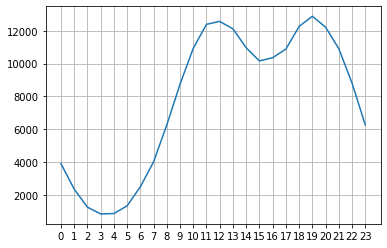

In [ ]:
keys = [x for x, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['count'])
plt.xticks(keys)
plt.grid()
plt.show()

In [ ]:
#7 to 12 will be the good time to advertise

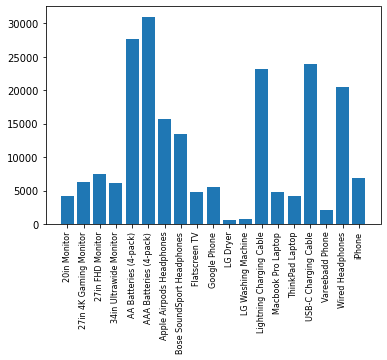

In [ ]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
#aaa batteries were sold mostly